## 유튜브 랭킹 데이터 수집하기

In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import pandas as pd

In [2]:
browser=webdriver.Chrome('chromedriver.exe')
url='https://youtube-rank.com/board/bbs/board.php?bo_table=youtube'
browser.get(url)

C:\Users\wjaud\AppData\Local\Temp\ipykernel_28852\347322031.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser=webdriver.Chrome('chromedriver.exe')


In [3]:
html=browser.page_source
soup=BeautifulSoup(html, 'html.parser')

In [4]:
channel_list=soup.select('tr')
print(len(channel_list), '\n')
print(channel_list[0])

102 

<tr>
<th class="rank"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=rank&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">순위 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="td_img">이미지</th>
<th class="subject">제목</th>
<th class="subscriber_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=subscriber_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">구독자순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="view_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=view_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">View순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="video_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=video_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">Video순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="hit"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=wr_hit&

In [5]:
channel_list=soup.select('form > table > tbody > tr')
print(len(channel_list))

100


In [6]:
channel=channel_list[0]
print(channel)

<tr class="aos-init aos-animate" data-aos="fade-up" data-aos-duration="800">
<td class="rank">
                        1                    </td>
<td class="td_img">
<div class="info_img"><a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203"><img class="lazyload" data-src="https://yt3.ggpht.com/hZDUwjoeQqigphL4A1tkg9c6hVp5yXmbboBR7PYFUSFj5PIJSA483NB5v7b0XVoTN9GCku3tqQ=s88-c-k-c0x00ffffff-no-nd-rj" height="88" src="https://yt3.ggpht.com/hZDUwjoeQqigphL4A1tkg9c6hVp5yXmbboBR7PYFUSFj5PIJSA483NB5v7b0XVoTN9GCku3tqQ=s88-c-k-c0x00ffffff-no-nd-rj" width="88"/></a></div>
<p class="info_rank">1</p>
</td>
<td class="subject">
<h1>
<p <a="" class="category" href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;sca=%EC%9D%8C%EC%95%85%2F%EB%8C%84%EC%8A%A4%2F%EA%B0%80%EC%88%98">[음악/댄스/가수]
                                
                                </p>
<a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203">
							

In [7]:
category=channel.select('p.category')[0].text.strip()
print(category)

[음악/댄스/가수]


In [8]:
title=channel.select('h1> a')[0].text.strip()
print(title)

BLACKPINK


In [9]:
subscriber=channel.select('.subscriber_cnt')[0].text
view=channel.select('.view_cnt')[0].text
video=channel.select('.video_cnt')[0].text
print(subscriber)
print(view)
print(video)

8200만
271억3846만
440개


In [10]:
channel_list=soup.select('tbody > tr')

for channel in channel_list:
    title=channel.select('h1 > a')[0].text.strip()
    category=channel.select('p.category')[0].text.strip()
    subscriber=channel.select('.subscriber_cnt')[0].text
    view=channel.select('.view_cnt')[0].text
    video=channel.select('.video_cnt')[0].text
    print(title, category, subscriber, view, video)

BLACKPINK [음악/댄스/가수] 8200만 271억3846만 440개
BANGTANTV [음악/댄스/가수] 7090만 180억0305만 1,818개
HYBE LABELS [음악/댄스/가수] 6830만 246억4108만 1,003개
SMTOWN [음악/댄스/가수] 3100만 256억3739만 3,981개
Boram Tube Vlog [보람튜브 브이로그] [키즈/어린이] 2650만 110억5288만 223개
JYP Entertainment [음악/댄스/가수] 2570만 176억8487만 1,556개
1MILLION Dance Studio [음악/댄스/가수] 2560만 74억9176만 4,487개
1theK (원더케이) [음악/댄스/가수] 2420만 228억2419만 17,141개
Mnet K-POP [음악/댄스/가수] 1980만 134억9355만 29,299개
KBS WORLD TV [TV/방송] 1830만 141억3769만 59,401개
officialpsy [음악/댄스/가수] 1760만 100억0517만 120개
JFlaMusic [음악/댄스/가수] 1760만 36억8291만 284개
Jane ASMR 제인 [음식/요리/레시피] 1690만 66억2682만 1,602개
BIGBANG [음악/댄스/가수] 1490만 74억3665만 776개
TWICE [음악/댄스/가수] 1480만 40억2076만 923개
Boram Tube ToysReview [보람튜브 토이리뷰] [키즈/어린이] 1440만 49억2928만 576개
Hongyu ASMR 홍유 [음식/요리/레시피] 1400만 44억4359만 541개
BIBO와 장난감 [키즈/어린이] 1260만 29억5314만 158개
Kendrick Lamar [미분류] 1140만 50억1339만 20개
핑크퐁 (인기 동요・동화) [키즈/어린이] 1100만 67억4552만 2,767개
Stray Kids [음악/댄스/가수] 1060만 21억9607만 639개
DuDuPopTOY [키즈/어린이] 1060만 49억0369만 2,2

IndexError: list index out of range

In [46]:
page=1
url='https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={}'.format(page)
print(url)

https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=1


In [64]:
result=[]
for page in range(1, 11):
    url = f"https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={page}" 
    browser.get(url)
    time.sleep(2)
    html=browser.page_source
    soup=BeautifulSoup(html, 'html.parser')
    channel_list=soup.select('form > table > tbody > tr')
    for channel in channel_list:
        title=channel.select('h1 > a')[0].text.strip()
        category=channel.select('p.category')[0].text.strip()
        subscriber=channel.select('.subscriber_cnt')[0].text
        view=channel.select('.view_cnt')[0].text
        video=channel.select('.video_cnt')[0].text
        data=[title, category, subscriber, view, video]
        print(data)
        result.append(data)

['BLACKPINK', '[음악/댄스/가수]', '8200만', '271억3846만', '440개']
['BANGTANTV', '[음악/댄스/가수]', '7090만', '180억0305만', '1,818개']
['HYBE LABELS', '[음악/댄스/가수]', '6830만', '246억4108만', '1,003개']
['SMTOWN', '[음악/댄스/가수]', '3100만', '256억3739만', '3,981개']
['Boram Tube Vlog [보람튜브 브이로그]', '[키즈/어린이]', '2650만', '110억5288만', '223개']
['JYP Entertainment', '[음악/댄스/가수]', '2570만', '176억8487만', '1,556개']
['1MILLION Dance Studio', '[음악/댄스/가수]', '2560만', '74억9176만', '4,487개']
['1theK (원더케이)', '[음악/댄스/가수]', '2420만', '228억2419만', '17,141개']
['Mnet K-POP', '[음악/댄스/가수]', '1980만', '134억9355만', '29,299개']
['KBS WORLD TV', '[TV/방송]', '1830만', '141억3769만', '59,401개']
['officialpsy', '[음악/댄스/가수]', '1760만', '100억0517만', '120개']
['JFlaMusic', '[음악/댄스/가수]', '1760만', '36억8291만', '284개']
['Jane ASMR 제인', '[음식/요리/레시피]', '1690만', '66억2682만', '1,602개']
['BIGBANG', '[음악/댄스/가수]', '1490만', '74억3665만', '776개']
['TWICE', '[음악/댄스/가수]', '1480만', '40억2076만', '923개']
['Boram Tube ToysReview [보람튜브 토이리뷰]', '[키즈/어린이]', '1440만', '49억2928만', '576

['카 로봇 장난감 Car Robot  Toys', '[키즈/어린이]', '314만', '18억0982만', '3,592개']
['HyunA', '[음악/댄스/가수]', '313만', '5억4179만', '83개']
['MariAndToys', '[키즈/어린이]', '313만', '5억7732만', '229개']
['Chihun ASMR 치훈', '[음식/요리/레시피]', '311만', '6억3726만', '630개']
['피지컬갤러리', '[스포츠/운동]', '310만', '7억1091만', '759개']
['odg', '[취미/라이프]', '308만', '5억6615만', '142개']
['Thankyou BUBU', '[취미/라이프]', '308만', '5억5729만', '134개']
['Boys Playtime', '[키즈/어린이]', '307만', '15억4227만', '575개']
['Bob ToysReview', '[키즈/어린이]', '305만', '13억7646만', '184개']
['FRAN', '[음식/요리/레시피]', '304만', '11억1232만', '1,904개']
['런닝맨 - 스브스 공식 채널', '[TV/방송]', '297만', '43억8466만', '54,597개']
['SBS 뉴스', '[뉴스/정치/사회]', '294만', '50억8169만', '145,288개']
['TVCHOSUN - TV조선', '[뉴스/정치/사회]', '293만', '48억9966만', '76,783개']
['ATEEZ', '[TV/방송]', '292만', '4억1532만', '683개']
['새송 Saesong', '[음악/댄스/가수]', '290만', '3억1166만', '255개']
['양수빈', '[음식/요리/레시피]', '287만', '5억2401만', '363개']
['EBSDocumentary (EBS 다큐)', '[TV/방송]', '285만', '26억1114만', '32,098개']
['지현꿍', '[음식/요리/레시피]', '284만',

['밝은 면 Bright Side Korea', '[IT/기술/컴퓨터]', '182만', '5억3632만', '4,318개']
['ASMR Suna 꿀꿀선아', '[음식/요리/레시피]', '181만', '4억5943만', '336개']
['푸디랜드 FoodieLand', '[미분류]', '180만', '9억1794만', '718개']
['내셔널지오그래픽 - National Geographic Korea', '[애완/반려동물]', '180만', '8억2561만', '3,487개']
['꾹TV(Kkuk TV)', '[키즈/어린이]', '180만', '11억3387만', '1,588개']
['WildBrain 한국어', '[키즈/어린이]', '179만', '7억2611만', '2,556개']
['신사임당', '[주식/경제/부동산]', '179만', '2억9543만', '1,448개']
['진성호방송', '[뉴스/정치/사회]', '179만', '31억8507만', '11,921개']
['오킹TV', '[TV/방송]', '178만', '8억2787만', '1,705개']
['SPOTV', '[스포츠/운동]', '178만', '13억8657만', '30,679개']
['조효진 HYOJIN', '[패션/미용]', '178만', '2억0319만', '388개']
['KBS 한국방송', '[TV/방송]', '177만', '16억6497만', '30,642개']
['[상윤쓰]Sangyoon', '[BJ/인물/연예인]', '176만', '3억9457만', '189개']
['Clay Adventure 클레이 모험', '[키즈/어린이]', '175만', '9억6892만', '1,121개']
['Stray Kids Japan Official Youtube', '[미분류]', '175만', '2억0390만', '111개']
['OfficialLEEHI', '[음악/댄스/가수]', '175만', '4억5539만', '106개']
['보물섬', '[BJ/인물/연예인]', '175만', '1

['AOA', '[음악/댄스/가수]', '130만', '7억3008만', '197개']
['dingo global DGG', '[TV/방송]', '130만', '4억1090만', '456개']
['SEVENTEEN Japan official Youtube', '[음악/댄스/가수]', '129만', '2억4999만', '122개']
['Netflix Korea 넷플릭스 코리아', '[영화/만화/애니]', '129만', '4억2278만', '1,982개']
['kiu기우쌤', '[패션/미용]', '129만', '4억4783만', '426개']
['먹어볼래TryToEat', '[음식/요리/레시피]', '129만', '2억1924만', '258개']
['오마이TV', '[뉴스/정치/사회]', '129만', '9억7269만', '18,541개']
['임다TV', '[BJ/인물/연예인]', '129만', '4억2997만', '1,121개']
['정선호', '[BJ/인물/연예인]', '129만', '5억1440만', '486개']
['뉴욕이랑 놀자 ♬', '[키즈/어린이]', '128만', '4억7646만', '542개']
['사람사는세상노무현재단', '[뉴스/정치/사회]', '128만', '1억6450만', '1,013개']
['탱구TV', '[취미/라이프]', '128만', '4860만', '27개']
['토비아트 - TobiART', '[키즈/어린이]', '127만', '4억3383만', '133개']
['퍼런안경_BLAS', '[미분류]', '127만', '3억1374만', '109개']
["리뷰엉이: Owl's Review", '[영화/만화/애니]', '127만', '3억8635만', '487개']
['Squash Clay 쪼물쪼물 클레이', '[취미/라이프]', '127만', '2억4685만', '477개']
['박막례 할머니 Korea_Grandma', '[BJ/인물/연예인]', '127만', '4억5627만', '493개']
['RealVIXX', '[음악/

['sankok esl', '[TV/방송]', '104만', '926만', '111개']
['딴지방송국', '[뉴스/정치/사회]', '104만', '2억7386만', '784개']
['ZeeKay Junior', '[해외]', '103만', '9억8390만', '1,025개']
['채꾸똥꾸 (Cherry & Dong)', '[미분류]', '103만', '3억5437만', '327개']
['WatchcarTV', '[영화/만화/애니]', '103만', '5억0290만', '201개']
['Official fromis_9', '[음악/댄스/가수]', '103만', '3억9496만', '761개']
['요리왕비룡 Korean Food Cooking', '[BJ/인물/연예인]', '103만', '2억1874만', '753개']
['라이징 보이스 | RISING VOICE', '[음악/댄스/가수]', '103만', '4억8735만', '4,081개']
['유준호', '[BJ/인물/연예인]', '103만', '4억7729만', '1,297개']
['맛있는 녀석들 (Tasty Guys)', '[음식/요리/레시피]', '103만', '12억6983만', '3,525개']
['Sibong 시봉', '[BJ/인물/연예인]', '103만', '6408만', '239개']
['Toy box', '[키즈/어린이]', '102만', '3억1140만', '432개']
['지식한입', '[미분류]', '102만', '1억0180만', '108개']
["연스커플 Yeon's Couple", '[미분류]', '102만', '2억2933만', '310개']
['토모토모TomoTomo', '[미분류]', '102만', '1억9351만', '173개']
['키에커', '[TV/방송]', '102만', '3억7423만', '217개']
['신비아파트 공식채널 - Shinbi House', '[영화/만화/애니]', '102만', '6억7386만', '1,698개']
['조섭 Jossup', '[BJ/

['1분과학', '[IT/기술/컴퓨터]', '86만', '8431만', '70개']
['롤롤라임[lollolraim]', '[키즈/어린이]', '86만', '8685만', '143개']
['로보카폴리 TV', '[키즈/어린이]', '86만', '5억6434만', '1,364개']
['빠더너스 BDNS', '[미분류]', '86만', '2억8434만', '539개']
['요리용디 Yori Yongd', '[미분류]', '85만', '5억8229만', '280개']
['할명수', '[미분류]', '85만', '9491만', '133개']
['람다람 RAMDARAM', '[영화/만화/애니]', '85만', '1억1278만', '115개']
['과학드림 [Science Dream]', '[미분류]', '85만', '1억5944만', '131개']
['김이브님 [kim eve]', '[TV/방송]', '85만', '6억3411만', '2,836개']
['가로세로연구소', '[뉴스/정치/사회]', '85만', '6억4810만', '3,892개']
['HYOLYN 효린', '[음악/댄스/가수]', '85만', '2억2703만', '208개']
['라이브 아카데미', '[교육/강의]', '85만', '8643만', '654개']
['라이프타임', '[TV/방송]', '85만', '3억4087만', '1,899개']
['허미노MINO', '[음식/요리/레시피]', '85만', '3억4793만', '1,888개']
['Jin & Juice', '[미분류]', '85만', '1억8216만', '257개']
['Healing Meditation', '[음악/댄스/가수]', '85만', '1억0674만', '323개']
['HOLLAND', '[음악/댄스/가수]', '85만', '3075만', '30개']
['서울의소리 Voice of Seoul', '[뉴스/정치/사회]', '85만', '5억0951만', '11,834개']
['빨강도깨비', '[영화/만화/애니]', '85만', '

['123 GO! Korean', '[미분류]', '68만', '2억5997만', '368개']
['프응TV', '[미분류]', '68만', '1억9274만', '231개']
['띠예', '[음식/요리/레시피]', '68만', '8903만', '41개']
['헤이즐 Heizle', '[패션/미용]', '68만', '8029만', '333개']
['CK Animation School_2016-2018', '[영화/만화/애니]', '68만', '2억2737만', '698개']
['SonyToby', '[음악/댄스/가수]', '68만', '7443만', '120개']
['놀면서 배우는 심리학', '[미분류]', '68만', '6994만', '274개']
['会社員J', '[패션/미용]', '68만', '1억5000만', '502개']
['이재명', '[뉴스/정치/사회]', '68만', '1억3450만', '1,761개']
['굉장한 실험실', '[교육/강의]', '68만', '3억4164만', '208개']
['Crush', '[음악/댄스/가수]', '68만', '2억8010만', '85개']
['저라뎃 JUSTLIKETHAT', '[게임]', '68만', '7억6310만', '3,509개']
['[공식] 새날', '[뉴스/정치/사회]', '68만', '5억3406만', '7,559개']
['디스패치 / Dispatch', '[TV/방송]', '68만', '1억3010만', '7,913개']
['근황올림픽', '[미분류]', '68만', '3억7712만', '354개']
['UNDERkg', '[IT/기술/컴퓨터]', '68만', '3억9748만', '2,445개']
['성창경 TV', '[미분류]', '67만', '7억6890만', '12,946개']
['MBC 라디오 시사', '[뉴스/정치/사회]', '67만', '3억9618만', '11,584개']
['Troom Troom Kr', '[키즈/어린이]', '67만', '4억5935만', '2,281개']
['메

In [65]:
df=pd.DataFrame(result)
df.columns=['title', 'category', 'subscriber', 'view', 'video']
df.to_excel('youtube_rank.xlsx', index=False)

## 유튜브 랭킹 데이터 시각화하기

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
from matplotlib import font_manager, rc
import platform
if platform.system() == 'Windows':
    path='c:/Windows/Fonts/malgun.ttf'
    font_name=font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=='Darwin':
    rc('font', family='AppleGothic')
else:
    print('Check your OS system')

In [68]:
df=pd.read_excel('youtube_rank.xlsx')
df.head()

,title,category,subscriber,view,video
0,BLACKPINK,[음악/댄스/가수],8200만,271억3846만,440개
1,BANGTANTV,[음악/댄스/가수],7090만,180억0305만,"1,818개"
2,HYBE LABELS,[음악/댄스/가수],6830만,246억4108만,"1,003개"
3,SMTOWN,[음악/댄스/가수],3100만,256억3739만,"3,981개"
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개


In [69]:
df.tail()

,title,category,subscriber,view,video
995,단하나 DANHANA,[미분류],67만,1억1404만,68개
996,소윤Soyoon,[패션/미용],67만,7278만,210개
997,집나간햄지 Wandering Hamzy,[미분류],67만,4224만,69개
998,ASMR Boyoung 반보영,[미분류],67만,1억1864만,198개
999,도영도영이,[패션/미용],67만,5074만,180개


In [76]:
df['subscriber'][0:10]

0    8200만
1    7090만
2    6830만
3    3100만
4    2650만
5    2570만
6    2560만
7    2420만
8    1980만
9    1830만
Name: subscriber, dtype: object

In [77]:
df['subscriber'].str.replace('만','0000')[0:10]

0    82000000
1    70900000
2    68300000
3    31000000
4    26500000
5    25700000
6    25600000
7    24200000
8    19800000
9    18300000
Name: subscriber, dtype: object

In [78]:
df['replaced_subscriber']=df['subscriber'].str.replace('만','0000')
df.head()

,title,category,subscriber,view,video,replaced_subscriber
0,BLACKPINK,[음악/댄스/가수],8200만,271억3846만,440개,82000000
1,BANGTANTV,[음악/댄스/가수],7090만,180억0305만,"1,818개",70900000
2,HYBE LABELS,[음악/댄스/가수],6830만,246억4108만,"1,003개",68300000
3,SMTOWN,[음악/댄스/가수],3100만,256억3739만,"3,981개",31000000
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개,26500000


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                1000 non-null   object
 1   category             1000 non-null   object
 2   subscriber           1000 non-null   object
 3   view                 1000 non-null   object
 4   video                1000 non-null   object
 5   replaced_subscriber  1000 non-null   object
dtypes: object(6)
memory usage: 47.0+ KB


In [80]:
df['replaced_subscriber']=df['replaced_subscriber'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                1000 non-null   object
 1   category             1000 non-null   object
 2   subscriber           1000 non-null   object
 3   view                 1000 non-null   object
 4   video                1000 non-null   object
 5   replaced_subscriber  1000 non-null   int32 
dtypes: int32(1), object(5)
memory usage: 43.1+ KB


In [81]:
pivot_df = df.pivot_table(index = 'category', values = 'replaced_subscriber', aggfunc = ['sum','count'])
pivot_df.head()

,sum,count
,replaced_subscriber,replaced_subscriber
category,,
[BJ/인물/연예인],102860000,65
[IT/기술/컴퓨터],8870000,7
[TV/방송],258380000,130
[게임],66150000,54
[교육/강의],27030000,21


In [82]:
# 예제 3-61 데이터프레임의 칼럼명 변경하기
pivot_df.columns = ['subscriber_sum', 'category_count']
pivot_df.head()

,subscriber_sum,category_count
category,,
[BJ/인물/연예인],102860000,65
[IT/기술/컴퓨터],8870000,7
[TV/방송],258380000,130
[게임],66150000,54
[교육/강의],27030000,21


In [83]:
pivot_df=pivot_df.reset_index()
pivot_df.head()

,category,subscriber_sum,category_count
0,[BJ/인물/연예인],102860000,65
1,[IT/기술/컴퓨터],8870000,7
2,[TV/방송],258380000,130
3,[게임],66150000,54
4,[교육/강의],27030000,21


In [84]:
pivot_df=pivot_df.sort_values(by='subscriber_sum', ascending=False)
pivot_df.head()

,category,subscriber_sum,category_count
12,[음악/댄스/가수],784550000,162
16,[키즈/어린이],384640000,132
2,[TV/방송],258380000,130
11,[음식/요리/레시피],205620000,73
7,[미분류],185410000,148


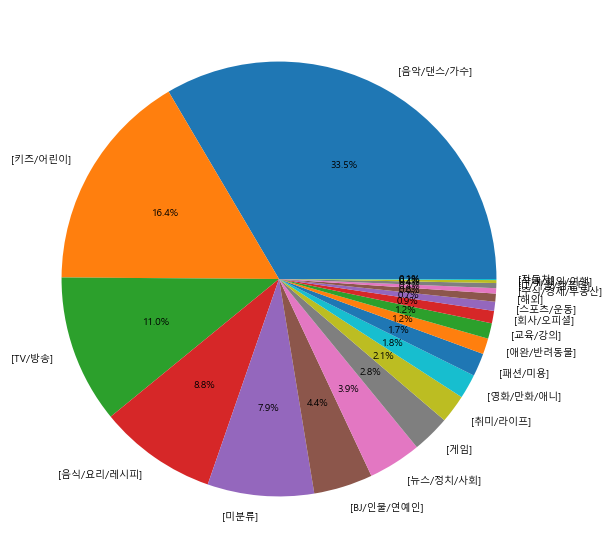

In [85]:
plt.figure(figsize=(30, 10))
plt.pie(pivot_df['subscriber_sum'], labels=pivot_df['category'], autopct='%1.1f%%')
plt.show()

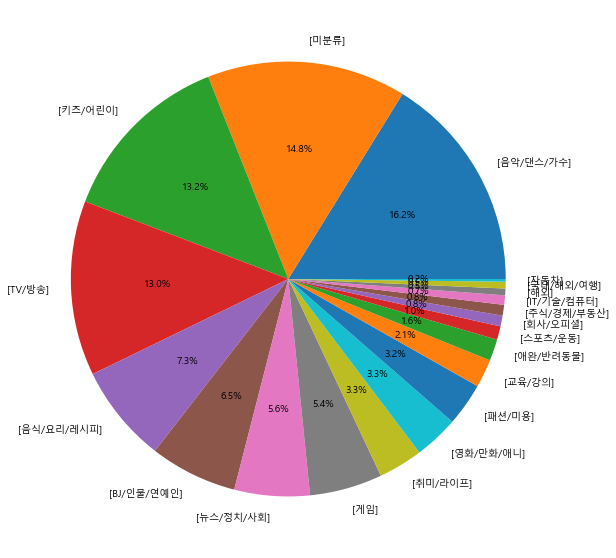

In [86]:
pivot_df=pivot_df.sort_values(by='category_count', ascending=False)
pivot_df.head()
plt.figure(figsize=(30, 10))
plt.pie(pivot_df['category_count'], labels=pivot_df['category'], autopct='%1.1f%%')
plt.show()